## Data Import

In [172]:
import pandas as pd
import re

In [173]:
data = pd.read_csv('data_imdb.csv')

## Data Exploration

In [174]:
data.shape

(9942, 23)

In [175]:
data.describe()

,Unnamed: 0,Imdb_rating,Votes,Runtime,User_review,Critic_review
count,9942.000000,9942.000000,9.942000e+03,9793.000000,9942.000000,9942.000000
mean,4970.500000,7.004838,7.203431e+04,111.559583,249.159626,113.713337
std,2870.152522,0.630415,1.488769e+05,22.697012,461.339070,111.841224
min,0.000000,5.900000,5.002000e+03,45.000000,1.000000,1.000000
25%,2485.250000,6.500000,8.935250e+03,97.000000,59.000000,39.000000
50%,4970.500000,7.000000,1.968450e+04,108.000000,116.000000,77.000000
75%,7455.750000,7.500000,6.573475e+04,122.000000,255.000000,147.750000
max,9941.000000,9.300000,2.394656e+06,439.000000,10936.000000,1010.000000


In [176]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [177]:
data.shape

(9942, 22)

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9942 entries, 0 to 9941
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             9942 non-null   object 
 1   Directors        9942 non-null   object 
 2   Writers          9942 non-null   object 
 3   Imdb_rating      9942 non-null   float64
 4   Score            9942 non-null   object 
 5   Genres           9942 non-null   object 
 6   Votes            9942 non-null   int64  
 7   Runtime          9793 non-null   float64
 8   Country          9942 non-null   object 
 9   Release_date     9938 non-null   object 
 10  Budget           6297 non-null   object 
 11  Opening_weekend  6223 non-null   object 
 12  Gross_USA        6786 non-null   object 
 13  Worldwide_gross  8153 non-null   object 
 14  Sound_mix        8732 non-null   object 
 15  Color            9914 non-null   object 
 16  Aspect_ratio     9456 non-null   object 
 17  Film_location 

## Data Cleaning

In [179]:
# Replace all NaN with x
data.fillna('xxx', inplace = True)

In [180]:
data.Release_date.replace('xxx',0, inplace = True)

In [181]:
col  =['Budget', 'Opening_weekend', 'Gross_USA',
       'Worldwide_gross','Oscars',
       'Score']
def replaceValueList(col,x,y):
    '''Replaces x by y in the list of value col'''
    for i in col:
        data[i] = data[i].str.replace(x, y)

In [182]:
replaceValueList(col, 'xxx', '0')

In [183]:
col1  =['Budget', 'Opening_weekend', 'Gross_USA',
       'Worldwide_gross']
for i in col:
    data[i] = data[i].str.replace(',','')
replaceValueList(col1,',','')

In [184]:
data.Score = data.Score.astype(float)
data.Oscars = data.Oscars.astype(int)

In [185]:
data1 = data.copy()

In [186]:
# data.Release_date.split('(')
data1[['Date_release','Country_release']] = data1['Release_date'].str.split('(', expand = True)

In [187]:
import datetime

# Convert data into dtaetime
data1['Release_date']=pd.to_datetime(data1['Date_release'],infer_datetime_format=True)
data1['Year_release'] = data1['Release_date'].dt.year
data1['Month_release'] = data1['Release_date'].dt.month
data1['Day_release'] = data1['Release_date'].dt.day

In [188]:
# take out all string
data1['Currencies'] = data1['Budget'].str.replace('\d+', '')

<ipython-input-188-2af9a4b7f629>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data1['Currencies'] = data1['Budget'].str.replace('\d+', '')


In [189]:
data1.head(2)

,Name,Directors,Writers,Imdb_rating,Score,Genres,Votes,Runtime,Country,Release_date,...,Summary,User_review,Critic_review,Oscars,Date_release,Country_release,Year_release,Month_release,Day_release,Currencies
0,Lone Wolf and Cub: Baby Cart at the River Styx...,[],"['Kazuo Koike', 'Goseki Kojima', '1 more credit']",8.0,0.0,"[' Action', ' Adventure', ' Drama']",5682,82.0,Japan,1972-04-22,...,"Trailed by a clan of female ninja, Ogami is pa...",29,60,0,22 April 1972,Japan),1972.0,4.0,22.0,
1,The Emigrants (1971),[],"['Bengt Forslund', 'Jan Troell', '1 more credit']",8.0,0.0,"[' Drama', ' History']",5903,191.0,Sweden,1974-03-13,...,"Småland, Sweden, mid-19th century. A farming f...",18,37,0,13 March 1974,France),1974.0,3.0,13.0,


In [190]:
data.Score = data.Score.astype(float)
data.Oscars = data.Oscars.astype(int)

In [191]:
usa_data = data1.copy()

In [192]:
# Drop all lines with currencies different from dollar
usa_data.drop(usa_data.loc[usa_data['Currencies'] != '$'].index, inplace = True)

In [193]:
import re

def retrieve_number(text):
    ''' Retrieves all numbers from an alphanumerique(text) in thier order of occurence'''
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)
col  =['Budget', 'Opening_weekend', 'Gross_USA',
       'Worldwide_gross']
for i in col:
    usa_data[i] = usa_data[i].apply(lambda x: retrieve_number(x)).values.astype('double')

In [194]:
usa_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5368 entries, 2 to 9941
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             5368 non-null   object        
 1   Directors        5368 non-null   object        
 2   Writers          5368 non-null   object        
 3   Imdb_rating      5368 non-null   float64       
 4   Score            5368 non-null   float64       
 5   Genres           5368 non-null   object        
 6   Votes            5368 non-null   int64         
 7   Runtime          5368 non-null   object        
 8   Country          5368 non-null   object        
 9   Release_date     5368 non-null   datetime64[ns]
 10  Budget           5368 non-null   float64       
 11  Opening_weekend  5368 non-null   float64       
 12  Gross_USA        5368 non-null   float64       
 13  Worldwide_gross  5368 non-null   float64       
 14  Sound_mix        5368 non-null   object 

In [195]:
usa_data.head(2)

,Name,Directors,Writers,Imdb_rating,Score,Genres,Votes,Runtime,Country,Release_date,...,Summary,User_review,Critic_review,Oscars,Date_release,Country_release,Year_release,Month_release,Day_release,Currencies
2,The Last Picture Show (1971),[],"['Larry McMurtry', 'Peter Bogdanovich', '1 mor...",8.0,93.0,"[' Drama', ' Romance']",43582,118.0,USA,1971-10-22,...,"In 1951, a group of high schoolers come of age...",203,95,2,22 October 1971,USA),1971.0,10.0,22.0,$
4,The Conformist (1970),[],"['Alberto Moravia', 'Bernardo Bertolucci', '1 ...",8.0,100.0,[' Drama'],27867,113.0,Italy,1971-03-21,...,A weak-willed Italian man becomes a fascist fl...,118,130,0,21 March 1971,USA),1971.0,3.0,21.0,$


In [196]:
# Creation of useful columns
usa_data['Decade_release'] = usa_data['Year_release'].apply(lambda x: (int(x)//10)*10 if x!= 0 else x)
usa_data['Profit'] = usa_data['Worldwide_gross'] - usa_data['Budget']
usa_data['Genre1'] = usa_data['Genres'].apply(lambda x: x.split(',')[0])
usa_data['Genre2'] = usa_data['Genre1'].apply(lambda x: x.replace("'",''))
usa_data['Genre3'] = usa_data['Genre2'].apply(lambda x: x.replace("[",''))
usa_data['Genre'] = usa_data['Genre3'].apply(lambda x: x.replace("]",''))
usa_data1 = usa_data.drop(['Directors','Writers','Summary','Country_release','Date_release','Film_location','Aspect_ratio','Sound_mix','Currencies','Color','Genres','Genre1','Genre2','Genre3'], axis=1)

In [197]:
usa_data1

,Name,Imdb_rating,Score,Votes,Runtime,Country,Release_date,Budget,Opening_weekend,Gross_USA,Worldwide_gross,User_review,Critic_review,Oscars,Year_release,Month_release,Day_release,Decade_release,Profit,Genre
2,The Last Picture Show (1971),8.0,93.0,43582,118.0,USA,1971-10-22,1300000.0,0.0,29133000.0,29146131.0,203,95,2,1971.0,10.0,22.0,1970,27846131.0,Drama
4,The Conformist (1970),8.0,100.0,27867,113.0,Italy,1971-03-21,750000.0,0.0,58657.0,400747.0,118,130,0,1971.0,3.0,21.0,1970,-349253.0,Drama
6,Papillon (1973),8.0,0.0,123557,151.0,France,1973-12-19,12000000.0,0.0,53267000.0,53267000.0,225,77,0,1973.0,12.0,19.0,1970,41267000.0,Biography
8,The Exorcist (1973),8.0,81.0,366945,122.0,USA,1973-12-26,11000000.0,8175666.0,232906145.0,441306145.0,1296,223,2,1973.0,12.0,26.0,1970,430306145.0,Horror
9,Fiddler on the Roof (1971),8.0,67.0,40224,181.0,USA,1971-11-03,9000000.0,1726942.0,10404330.0,10405457.0,175,75,3,1971.0,11.0,3.0,1970,1405457.0,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9930,The Kid (2019),5.9,0.0,7245,100.0,USA,2019-03-08,8000000.0,514286.0,1508593.0,1561698.0,122,36,0,2019.0,3.0,8.0,2010,-6438302.0,Biography
9932,Braven (2018),5.9,61.0,27732,94.0,Canada,2018-02-02,5000000.0,0.0,0.0,854319.0,289,69,0,2018.0,2.0,2.0,2010,-4145681.0,Action
9934,Sleight (2016),5.9,62.0,8140,89.0,USA,2017-04-28,250000.0,1701785.0,3986245.0,3989705.0,51,45,0,2017.0,4.0,28.0,2010,3739705.0,Crime
9936,The Prodigy (2019),5.9,0.0,23913,92.0,USA,2019-02-08,6000000.0,5853061.0,14856291.0,21150265.0,401,121,0,2019.0,2.0,8.0,2010,15150265.0,Fantasy


## Data analysis

In [198]:
import matplotlib.pyplot as plt

#### 1. Distribution des films par catégorie

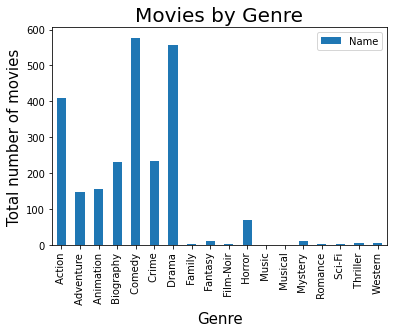

In [317]:
genres = usa_data1[['Name','Genre']].groupby('Genre')[['Name']].count()
genres.plot(kind = 'bar' )

plt.xlabel('Genre',fontsize = 15)
plt.ylabel('Total number of movies',fontsize = 15)
plt.title("Movies by Genre", fontsize=20, fontweight=3, color='black', loc='center' )
plt.show()

#### 2. Top 50 des budgets des films

In [283]:
Top50_budget = usa_data1[['Name','Budget']].sort_values('Budget', ascending = False)[0:50]

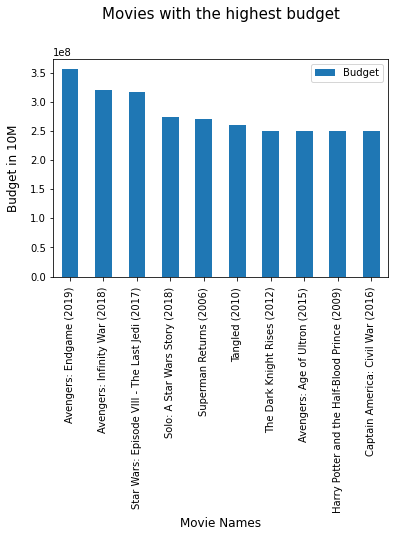

In [327]:
Top50_budget[:10].plot(x="Name", y='Budget', kind="bar")
fig = plt.figure(1, figsize=(150, 50))

plt.xlabel('Movie Names',fontsize = 12)
plt.ylabel('Budget in 10M',fontsize = 12, labelpad = 5)
plt.title("Movies with the highest budget", fontsize=15, fontweight=3, color='black', loc='center', pad = 40)
plt.show()

#### 3. Nombre de films sortie par décennie

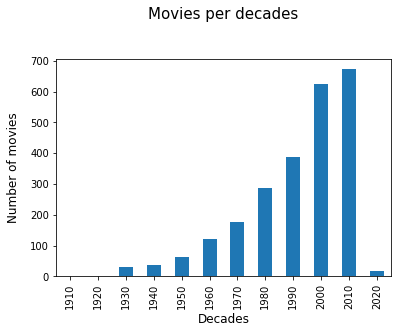

In [328]:
Decade_movie = usa_data1.groupby('Decade_release')['Name'].count()
Decade_movie.plot(x="Name", y='Decade_release', kind="bar")
plt.xlabel('Decades',fontsize = 12)
plt.ylabel('Number of movies',fontsize = 12, labelpad = 10)
plt.title("Movies per decades", fontsize=15, fontweight=3, color='black', loc='center', pad = 40)
plt.show()

#### 4. Top 20 films ayant générés le plus de revenu, le moins de revenu.

In [203]:
top_worldwide = usa_data1[['Name','Worldwide_gross']].sort_values('Worldwide_gross', ascending = False)[0:20]

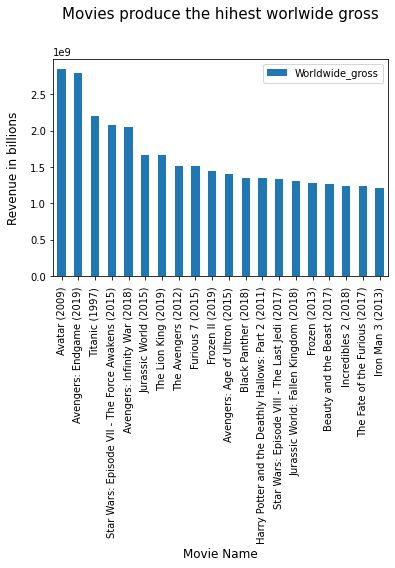

In [343]:
top_worldwide.plot(x="Name", y='Worldwide_gross', kind="bar")
plt.xlabel('Movie Name',fontsize = 12)
plt.ylabel('Revenue in billions',fontsize = 12, labelpad = 10)
plt.title("Movies with the hihest worlwide gross", fontsize=15, fontweight=3, color='black', loc='center', pad = 40)
plt.show()

In [205]:
worldwide = usa_data1[['Name','Worldwide_gross']]

In [206]:
a = worldwide[worldwide['Worldwide_gross'] == 0].index
low_worldwide =worldwide.drop(a).sort_values('Worldwide_gross')[0:20]

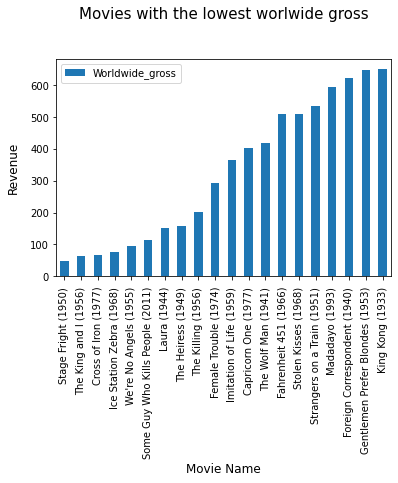

In [344]:
low_worldwide.plot(x="Name", y='Worldwide_gross', kind="bar")
plt.xlabel('Movie Name',fontsize = 12)
plt.ylabel('Revenue',fontsize = 12, labelpad = 10)
plt.title("Movies with the lowest worlwide gross", fontsize=15, fontweight=3, color='black', loc='center', pad = 40)
plt.show()

#### 5. Analyse de la popularité des films en fonction de leurs budgets

In [208]:
movie_budget = usa_data1[['Name','Votes','Budget']].sort_values(by=['Votes','Budget'],ascending=[False,False])

<AxesSubplot:>

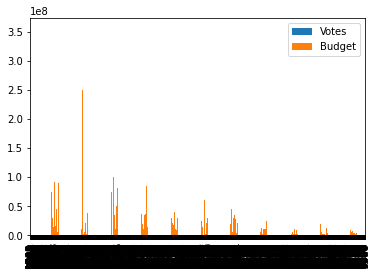

In [269]:
# movie_budget.plot(kind = 'bar')

#### 6. Distribution des revenus générés par genre de film

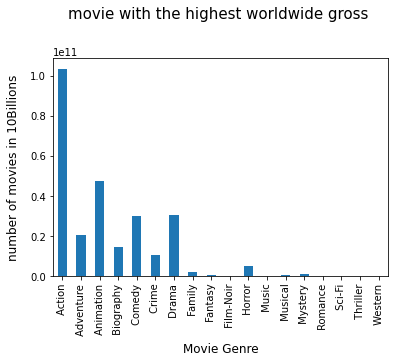

In [342]:
gross_movie = usa_data1[['Worldwide_gross','Genre']]
gross_movie.groupby('Genre')['Worldwide_gross'].sum().plot(y = 'Worldwide_gross',kind ='bar')
plt.xlabel('Movie Genre',fontsize = 12)
plt.ylabel('number of movies in 10Billions',fontsize = 12, labelpad = 10)
plt.title("movie with the highest worldwide gross ", fontsize=15, fontweight=3, color='black', loc='center', pad = 40)
plt.show()

#### 7. Top 10 des films par retour sur investissement

In [211]:
top10profit = usa_data1[['Profit','Name']].sort_values('Profit', ascending = False  )[:10]

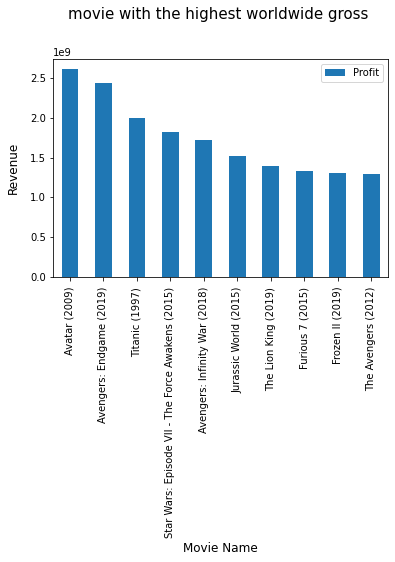

In [341]:
top10profit.plot(x="Name", y='Profit', kind="bar")
plt.xlabel('Movie Name',fontsize = 12)
plt.ylabel('Revenue',fontsize = 12, labelpad = 10)
plt.title("movie with the highest worldwide gross ", fontsize=15, fontweight=3, color='black', loc='center', pad = 40)
plt.show()

#### 8. Note moyenne par année de sortie de film

In [273]:
usa_data1.drop(usa_data1.loc[usa_data1['Score']==0].index, inplace=True)
score_year = usa_data1.groupby('Year_release')['Score'].mean()


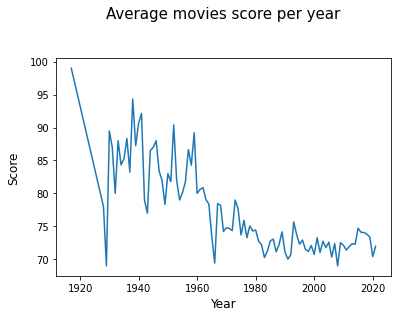

In [345]:
score_year.plot()
plt.xlabel('Year',fontsize = 12)
plt.ylabel('Score',fontsize = 12, labelpad = 10)
plt.title("Average movies score per year", fontsize=15, fontweight=3, color='black', loc='center', pad = 40)
plt.show()

#### 9. Top 10 des budgets par mois

In [247]:
Budget_month = usa_data1[['Name','Month_release','Budget']].groupby('Month_release')['Budget'].sum()

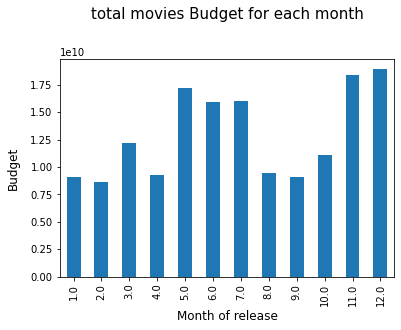

In [338]:
Budget_month.plot(kind = 'bar')
plt.xlabel('Month of release',fontsize = 12)
plt.ylabel('Budget',fontsize = 12, labelpad = 10)
plt.title("total movies Budget for each month", fontsize=15, fontweight=3, color='black', loc='center', pad = 40)
plt.show()

#### 10. Mois avec le plus grand nombre de film

In [224]:
month_film = usa_data1[['Name','Month_release']]

In [231]:
topmonth = month_film.groupby('Month_release')['Name'].count().sort_values('Name', ascending = True)

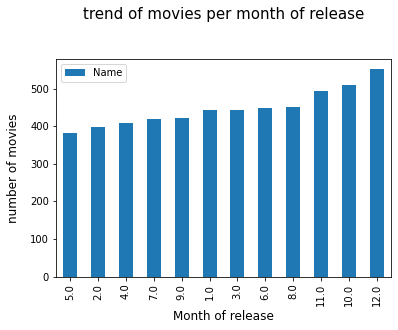

In [337]:
topmonth.plot(kind= 'bar')
plt.xlabel('Month of release',fontsize = 12)
plt.ylabel('number of movies',fontsize = 12, labelpad = 10)
plt.title("trend of movies per month of release", fontsize=15, fontweight=3, color='black', loc='center', pad = 40)
plt.show()

#### 11. Correlation des parametres

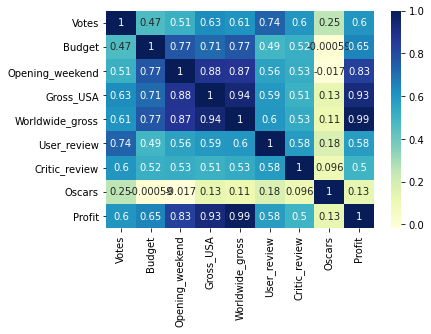

In [257]:
import seaborn as sb
corr_val = usa_data1[['Votes', 'Budget', 'Opening_weekend', 'Gross_USA',
       'Worldwide_gross', 'User_review', 'Critic_review', 'Oscars',
       'Profit']]
# plotting correlation heatmap
dataplot = sb.heatmap(corr_val.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

#### 12. months and years with the highest number of oscars

In [333]:
Oscars_month = usa_data1[['Oscars','Month_release']].groupby('Month_release').sum().sort_values('Oscars',ascending = False)

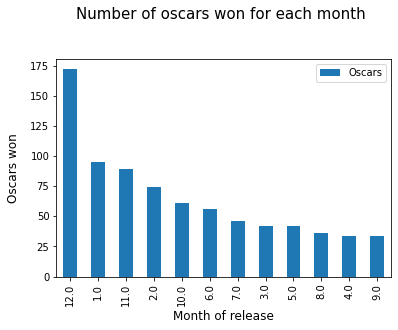

In [335]:
Oscars_month.plot(kind = "bar")
plt.xlabel('Month of release',fontsize = 12)
plt.ylabel('Oscars won',fontsize = 12, labelpad = 10)
plt.title("Number of oscars won for each month ", fontsize=15, fontweight=3, color='black', loc='center', pad = 40)
plt.show()

#### 13. months and years with the highest number of oscars

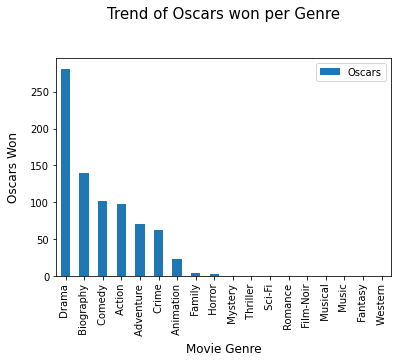

In [332]:
Oscars_genre = usa_data1[['Oscars','Genre']].groupby('Genre').sum().sort_values('Oscars',ascending = False)
Oscars_genre.plot(kind = 'bar')
plt.xlabel('Movie Genre',fontsize = 12)
plt.ylabel('Oscars Won',fontsize = 12, labelpad = 10)
plt.title("Trend of Oscars won per Genre", fontsize=15, fontweight=3, color='black', loc='center', pad = 40)
plt.show()

#### 14. movies with a negatif profit

In [346]:
profit_neg = usa_data1[['Profit','Name','Country','Budget']].sort_values('Profit',ascending = True)


In [347]:
profit_neg[:10]

,Profit,Name,Country,Budget
2843,-158031147.0,The Irishman (2019),USA,159000000.0
6117,-73434290.0,Missing Link (2019),Canada,100000000.0
4877,-50659079.0,The Madness of King George (1994),UK,65897768.0
4148,-50300000.0,Greyhound (2020),USA,50300000.0
3041,-47950177.0,Okja (2017),South Korea,50000000.0
1542,-46819913.0,The Iron Giant (1999),USA,70000000.0
2864,-43440840.0,Mr. Nobody (2009),Belgium,47000000.0
1846,-41577912.0,Grindhouse (2007),USA,67000000.0
289,-40000000.0,Klaus (2019),Spain,40000000.0
4916,-38546877.0,The Adventures of Baron Munchausen (1988),UK,46630000.0
